In [1]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [2]:
file = '../Resources/Contributions_2013.csv'
IC_2017 = pd.read_csv(file,index_col='CandidateName')
uncleaned = pd.read_csv(file,index_col=False)
IC_2017.head()

/Users/Abir/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Election,CandidateID,Date,Name,ContributerType,BoroughName,City,State,ZipCode,ContributionState,Amount,MatchAmt,PrevAmt,PayMethod,TotalAmount
CandidateName,,,,,,,,,,,,,,,,
"Coenen, Jr., Kevin P",0,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NY,10.0,0.0,0.0,Credit Card,10.0
"Coenen, Jr., Kevin P",1,2013,1286,4/17/2013,"Walter, Dorsey",Individual,Manhattan,New York,NY,10150.0,NaN,175.0,175.0,0.0,Credit Card,350.0
"Coenen, Jr., Kevin P",2,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NaN,-10.0,0.0,0.0,Unknown,-10.0
"Marks, Philip A",3,2013,1551,2/13/2012,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,400.0,175.0,0.0,Check,575.0
"Marks, Philip A",4,2013,1551,2/28/2013,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,100.0,0.0,400.0,Cash,500.0


In [3]:
IC_2017['ZipCode'] = IC_2017['ZipCode'].apply(str)

In [4]:
IC_2017_df = IC_2017.drop(columns=['ContributionState','PayMethod','Name','CandidateID','Unnamed: 0','Election','BoroughName','Amount','MatchAmt','PrevAmt'])
total_groupby = IC_2017_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,TotalAmount
CandidateName,
"de Blasio, Bill",1.497036e+07
"Quinn, Christine C",1.209154e+07
"Thompson, Jr., William C",6.111452e+06
"Lhota, Joseph J",4.981273e+06
"Hidary, Jack D",6.760667e+05
"Salgado, Erick J",4.948541e+05
"Liu, John C",4.045000e+05
"Weiner, Anthony D",2.301887e+05
"Albanese, Sal F",3.092800e+04


<AxesSubplot:xlabel='CandidateName'>

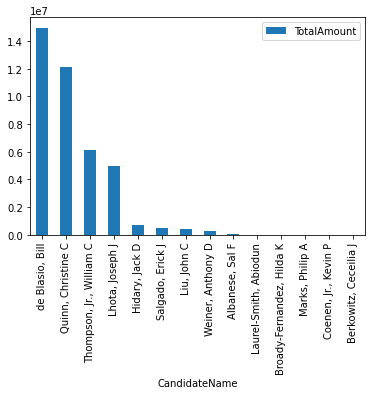

In [5]:
total_groupby.plot.bar()

In [15]:
type_and_amount = IC_2017_df.groupby(['ContributerType']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
type_and_amount 

,TotalAmount
ContributerType,
Individual,3.632493e+07
Political Action Committee,2.280769e+06
Labor Union,7.141742e+05
Limited Liability Company,2.427530e+05
Other,1.879544e+05
Candidate Family,8.332500e+04
Candidate,8.281355e+04
Candidate Committee,4.099988e+04
Party Committee,3.225000e+04


<AxesSubplot:xlabel='ContributerType'>

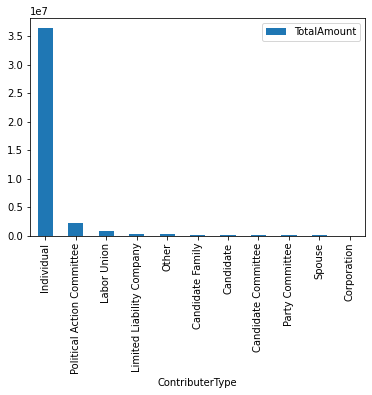

In [16]:
type_and_amount.plot.bar()

In [21]:
IC_2017['ZipCode'] = IC_2017['ZipCode'].apply(str)
zip_code = IC_2017_df.groupby(['ZipCode']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
zip_code

,TotalAmount
ZipCode,
10021.0,1.598795e+06
10011.0,1.303332e+06
10024.0,1.247388e+06
10023.0,1.203223e+06
10028.0,1.172787e+06
...,...
5189.0,0.000000e+00
48121.0,0.000000e+00
6015.0,0.000000e+00


<AxesSubplot:xlabel='ZipCode'>

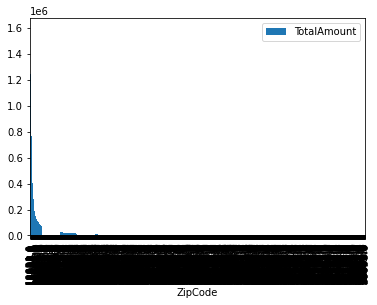

In [20]:
# IC_2017['ZipCode'] = IC_2017['ZipCode'].apply(str)
# zip_code.plot.bar()

In [22]:
date = IC_2017_df.groupby(['Date']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)

In [23]:
date

,TotalAmount
Date,
7/11/2013,821366.000000
7/11/2012,768453.000000
10/21/2013,758821.750000
1/10/2013,627622.459961
3/11/2013,565311.159990
...,...
4/17/2008,0.000000
12/18/2006,0.000000
12/7/2006,0.000000
